In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import os
if not os.getcwd().endswith('CIoTS'):
    os.chdir('../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CIoTS import *
import networkx as nx
from itertools import product

In [5]:
ts = pd.read_csv('notebooks/ICML/real_data/Canada.csv')

In [7]:
ts.columns

Index(['e', 'prod', 'rw', 'U'], dtype='object')

In [22]:
dim=4

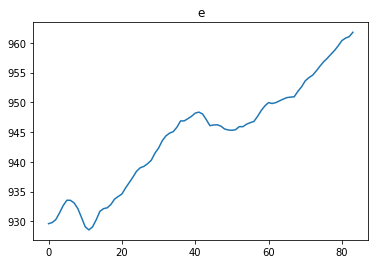

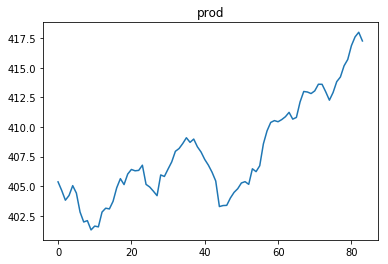

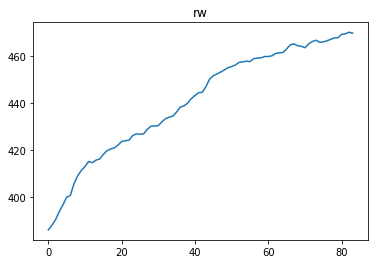

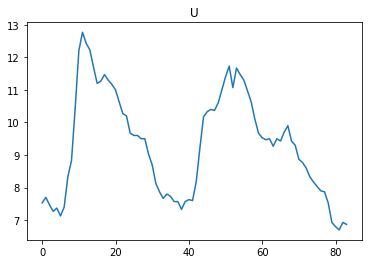

In [8]:
for col, data in ts.items():
    plt.plot(data)
    plt.title(col)
    plt.show()

In [69]:
stopper = ICStopper(dim=4, patiency=5)

In [70]:
graph, graphs, times, stopper2, _ = pc_incremental_pc1(indep_test=tigramite_partial_corr_test, ts=ts,
                                                       max_p=20, stopper=stopper, verbose=True)

/home/Daniel.Thevessen/Causality/CIoTS/src/tigramite/tigramite/independence_tests.py:1144: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_hat = numpy.linalg.lstsq(z, y)[0]


In [71]:
est_tau = stopper2.best_tau

In [72]:
positions = {node: position for node, position in zip(graph.nodes(), product(range(est_tau+1), range(dim)))}

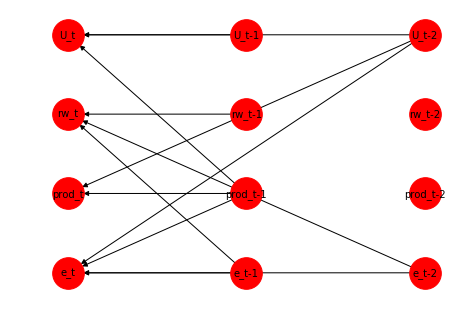

In [73]:
draw_graph(graph, dim, est_tau, positions)

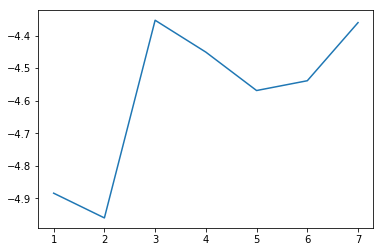

In [74]:
plt.plot(stopper2.scores().keys(), stopper2.scores().values())
plt.show()

In [75]:
node_mapping, data_matrix = transform_ts(ts, est_tau)
model = VAR(est_tau)
model.fit_from_graph(dim, data_matrix, graph)

In [76]:
params = model.params[1:]

In [77]:
for i, n1 in enumerate(list(graph.nodes)[:dim]):
    for j, n2 in enumerate(list(graph.nodes)[dim:]):
        if (n2, n1) in graph.edges:
            graph.edges[(n2, n1)]['weight'] = params[j, i]

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3


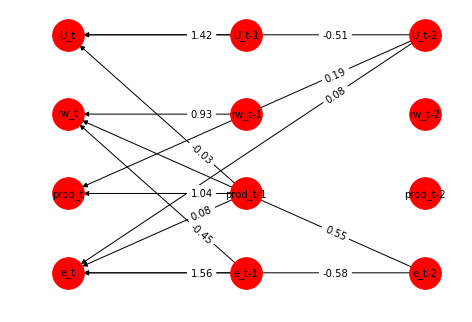

In [78]:
draw_graph(graph, dim, est_tau, positions)